In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OrdinalEncoder
from sqlalchemy import create_engine
from final_files.config import  config_ai

In [23]:
db_connection_str = f"mysql+pymysql://{config_ai['user']}:{config_ai['password']}@{config_ai['host']}:{config_ai['port']}/{config_ai['database']}"
engine = create_engine(db_connection_str)
df_clean = pd.read_sql(f'SELECT * FROM daytriptour_ai.clean_data', con=engine)

In [24]:
df_country = pd.read_csv('./raw_csv/dtt_country.csv')[['country_id','country_code','country_phonecode','country_name']]
id_to_countryCode = {i[1][0] : i[1][3] for i in df_country.iterrows()}
countryCode_to_id = {i[1][1] : i[1][0] for i in df_country.iterrows()}
phoneCode_to_id = {}
countryName_to_id = {i[1][3] : i[1][0] for i in df_country.iterrows()}
for i in df_country.iterrows():
    val = i[1][0]
    if len(i[1][2].split(',')) > 1:
        for j in i[1][2].split(','):
            phoneCode_to_id[j] = val
    else:
        phoneCode_to_id[i[1][2]] = val

## ความสัมพันธ์ของวันที่จอง

Percentile 90 : 4 days


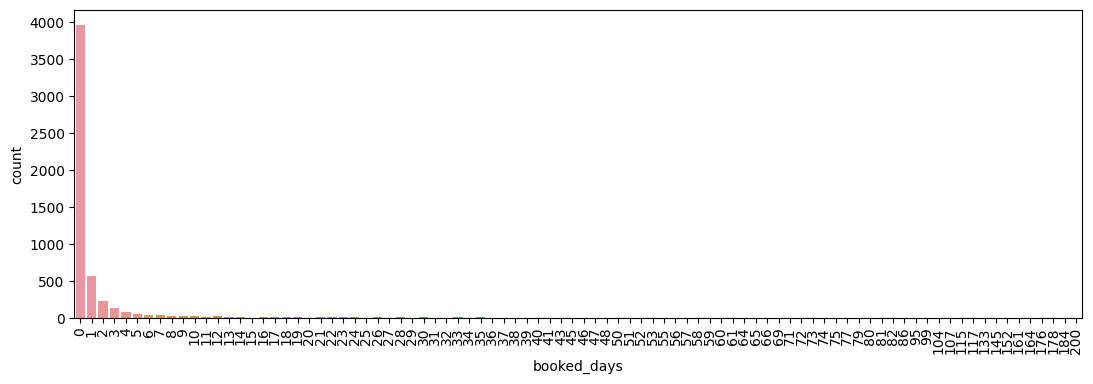

In [25]:
# 80% booking before a day and 90% booking before 4 days
print('Percentile 90 :',int(df_clean['booked_days'].quantile(.9)), 'days')
plt.figure(figsize=(13, 4))
sns.countplot(data=df_clean, x = 'booked_days')
plt.xticks(rotation=90)
plt.show()

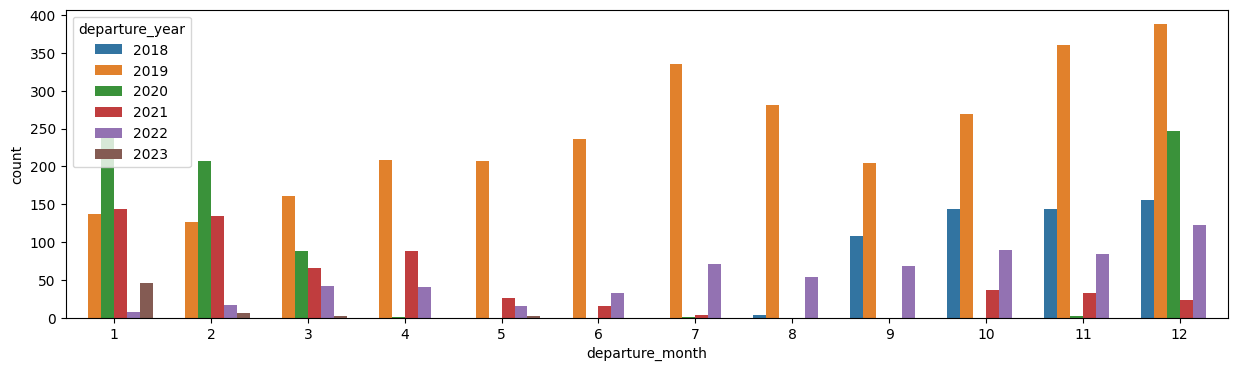

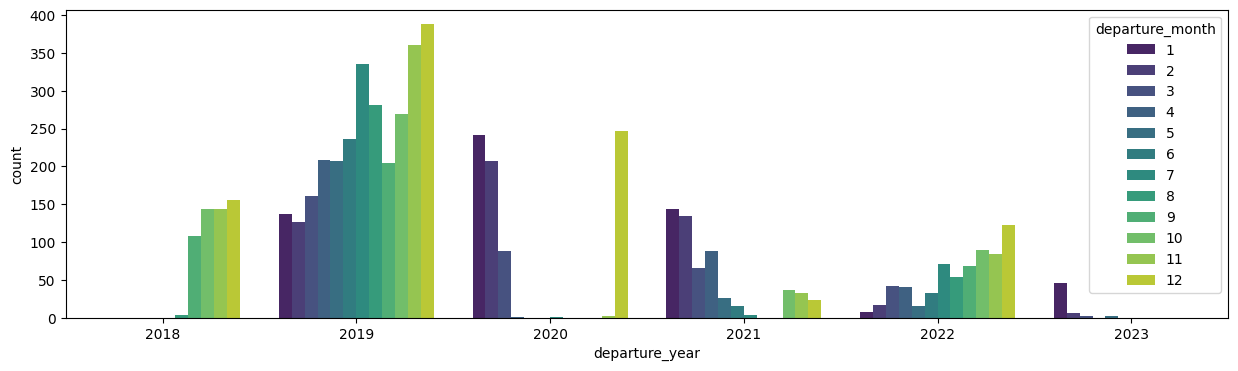

In [26]:
# high season start on September
plt.figure(figsize=(15, 4))
sns.countplot(data=df_clean, x = 'departure_month', hue='departure_year')
plt.show()
plt.figure(figsize=(15, 4))
sns.countplot(data=df_clean, x = 'departure_year', hue='departure_month', palette="viridis")
plt.show()

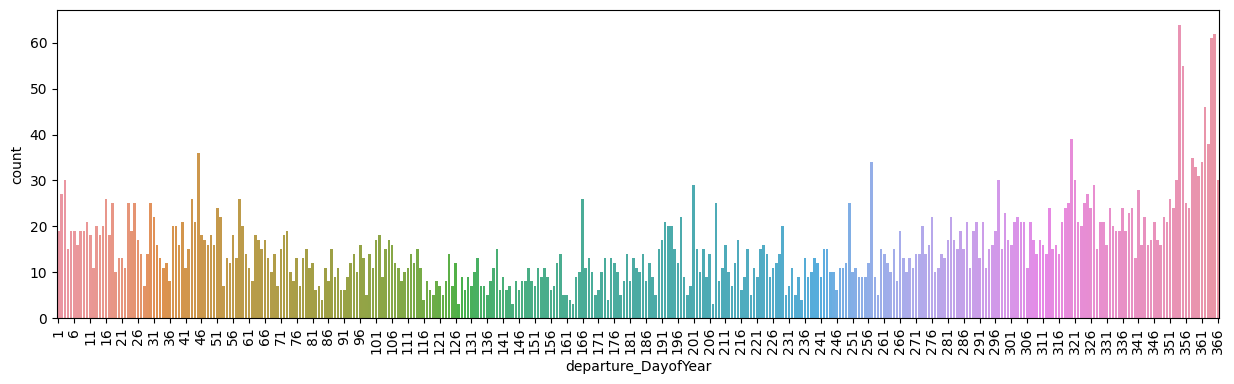

In [27]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_clean, x = 'departure_DayofYear')
plt.xticks(rotation=90)
plt.xticks(range(0, 366,5))
plt.show()

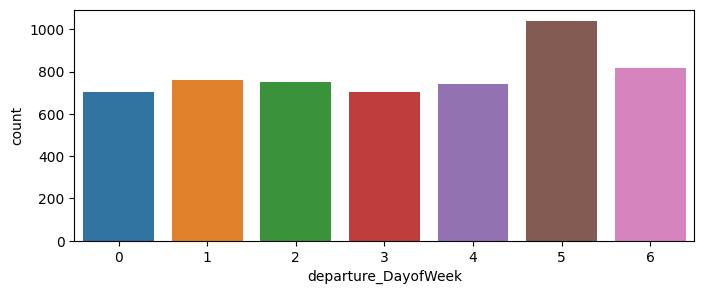

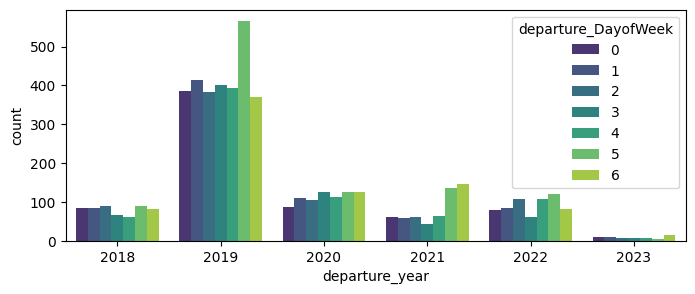

In [28]:
# departure date on Saturday and Sunday
plt.figure(figsize=(8, 3))
sns.countplot(data=df_clean, x = 'departure_DayofWeek')
plt.show()
plt.figure(figsize=(8, 3))
sns.countplot(data=df_clean, x = 'departure_year', hue='departure_DayofWeek', palette="viridis")
plt.show()

## ความสัมพันธ์ระหว่างประเทศ

218 : Thailand
105 : India
 77 : United Kingdom
 38 : Canada
 13 : Australia


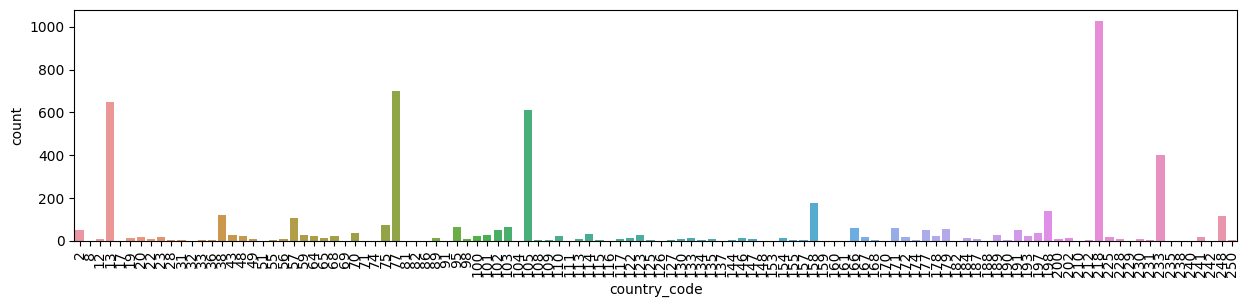

0:Mr. , 1:Ms. , 3:Mrs.


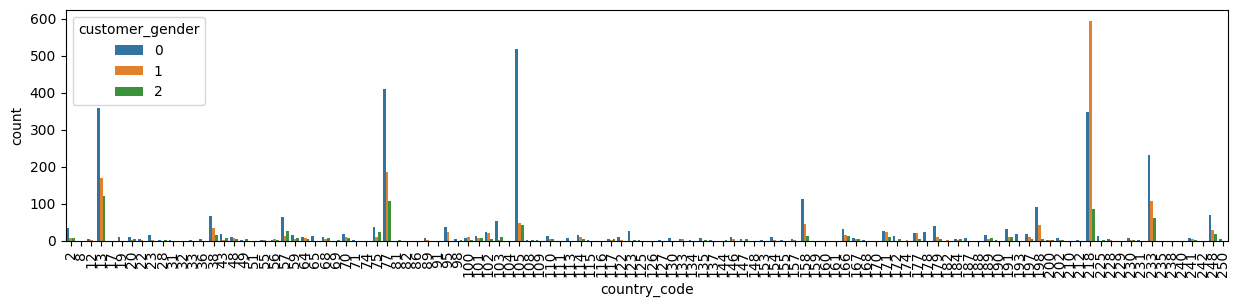

In [29]:
print(f'218 : {id_to_countryCode[218]}\n105 : {id_to_countryCode[105]}\n 77 : {id_to_countryCode[77]}\n 38 : {id_to_countryCode[38]}\n 13 : {id_to_countryCode[13]}')
plt.figure(figsize=(15, 3))
sns.countplot(data=df_clean, x = 'country_code')
plt.xticks(rotation=90)
plt.show()
print('0:Mr. , 1:Ms. , 3:Mrs.')
plt.figure(figsize=(15, 3))
sns.countplot(data=df_clean, x = 'country_code', hue='customer_gender')
plt.xticks(rotation=90)
plt.show()

0:Android Browse 1:AppleWebKit 2:Chrome 3:Edge 4:Windows 5:Firefox 6:MSIE 7:Opera Next 8:Safari 9:SamsungBrowser 10:Vivaldi -1:nan


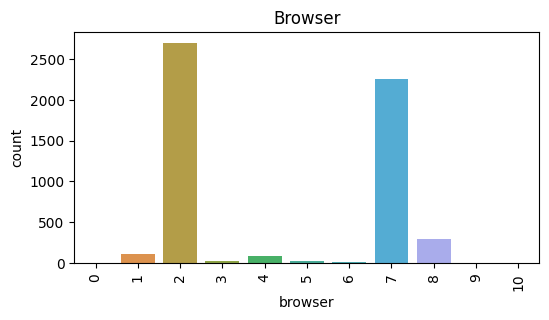

0:Android 1:Chrome OS 2:Linux 3:Macintosh 4:Windows 5:iPad 6:iPhone -1:nan


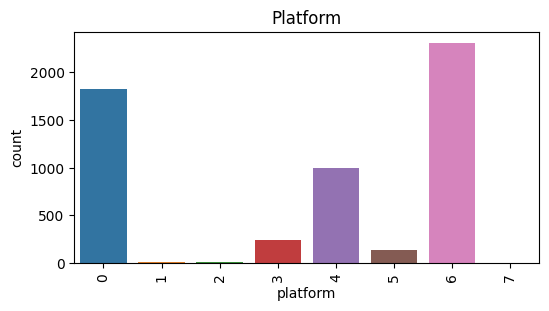

In [30]:
print('0:Android Browse', '1:AppleWebKit', '2:Chrome', '3:Edge', '4:Windows', '5:Firefox','6:MSIE', '7:Opera Next', '8:Safari','9:SamsungBrowser','10:Vivaldi','-1:nan')
plt.figure(figsize=(6, 3))
sns.countplot(data=df_clean, x = 'browser')
plt.xticks(rotation=90)
plt.title('Browser')
plt.show()

print('0:Android', '1:Chrome OS', '2:Linux', '3:Macintosh', '4:Windows', '5:iPad','6:iPhone', '-1:nan')
plt.figure(figsize=(6, 3))
sns.countplot(data=df_clean, x = 'platform')
plt.xticks(rotation=90)
plt.title('Platform')
plt.show()

## ความสัมพันธ์สินค้า

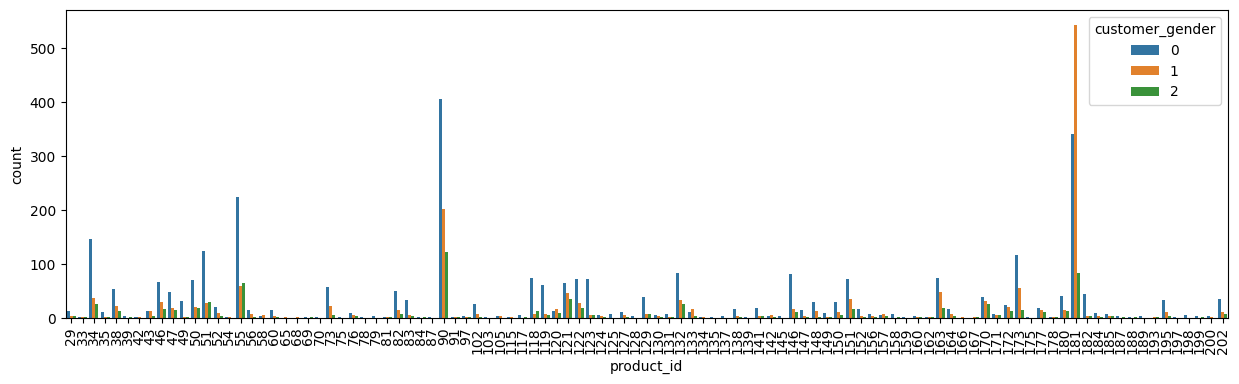

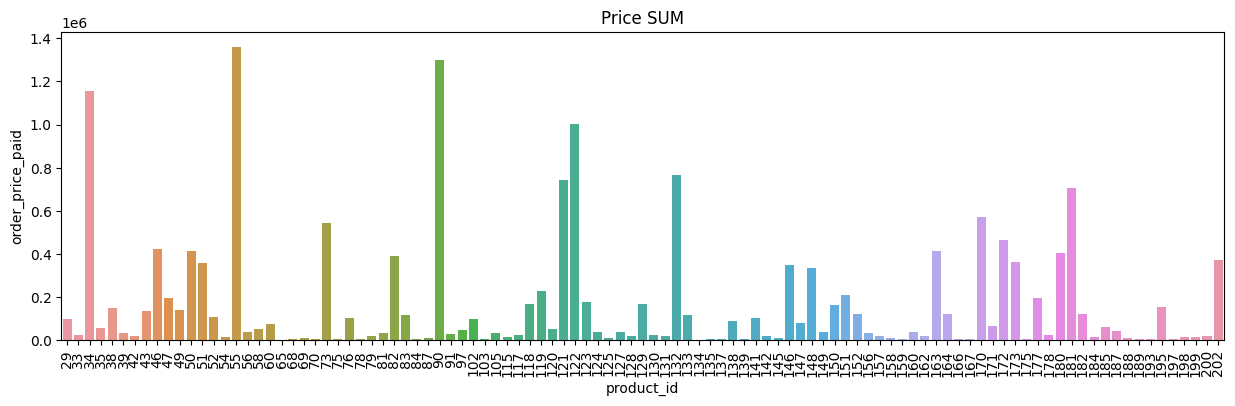

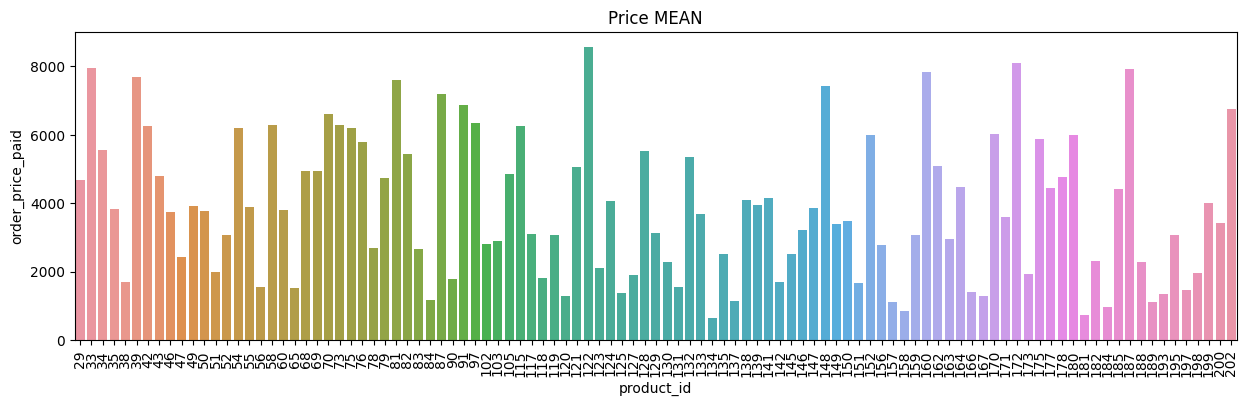

In [31]:
# product_id 181 
plt.figure(figsize=(15, 4))
sns.countplot(data=df_clean, x = 'product_id', hue='customer_gender')
plt.xticks(rotation=90)
plt.show()

df_group = df_clean[['product_id','order_price_paid']].groupby(['product_id']).sum()
plt.figure(figsize=(15, 4))
sns.barplot(data=df_group, x = df_group.index, y = df_group['order_price_paid'])
plt.xticks(rotation=90)
plt.title('Price SUM')
plt.show()

df_group = df_clean[['product_id','order_price_paid']].groupby(['product_id']).mean()
plt.figure(figsize=(15, 4))
sns.barplot(data=df_group, x = df_group.index, y = df_group['order_price_paid'])
plt.xticks(rotation=90)
plt.title('Price MEAN')
plt.show()

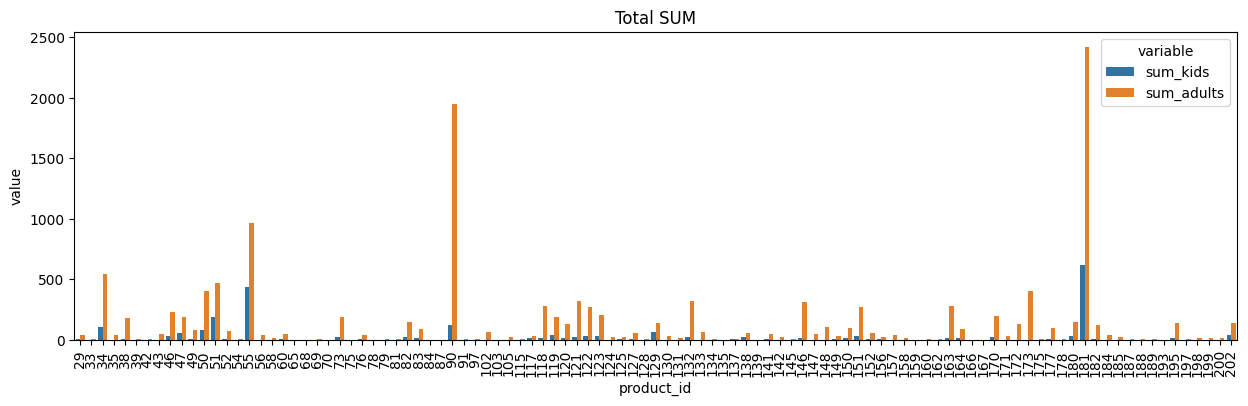

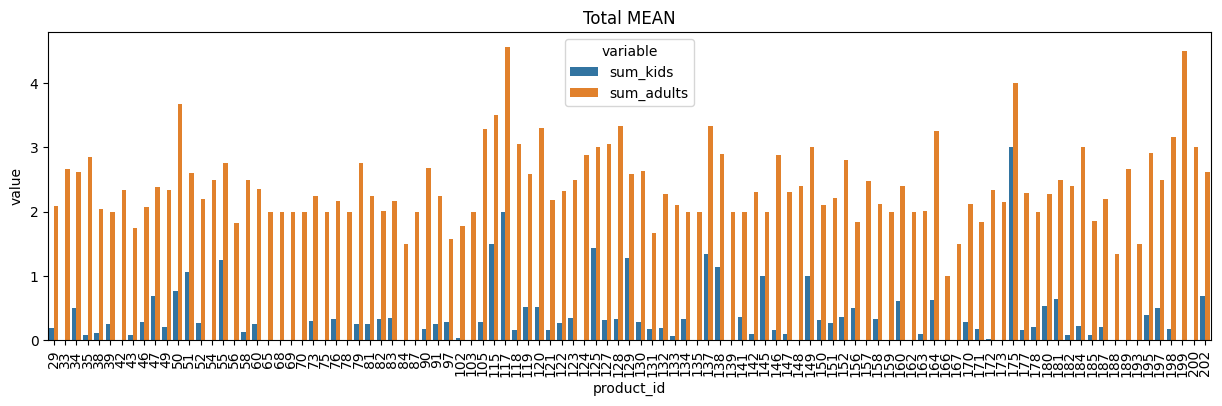

In [32]:
df_group = df_clean[['product_id','sum_kids', 'sum_adults']].groupby(['product_id'], as_index=False).sum()
df_group = df_group.melt(id_vars='product_id')
plt.figure(figsize=(15, 4))
sns.barplot(x='product_id', y='value', hue='variable', data=df_group)
plt.xticks(rotation=90)
plt.title('Total SUM')
plt.show()

df_group = df_clean[['product_id','sum_kids', 'sum_adults']].groupby(['product_id'], as_index=False).mean()
df_group = df_group.melt(id_vars='product_id')
plt.figure(figsize=(15, 4))
sns.barplot(x='product_id', y='value', hue='variable', data=df_group)
plt.xticks(rotation=90)
plt.title('Total MEAN')
plt.show()